In [1]:
import requests
from bs4 import BeautifulSoup
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats
from scipy.optimize import curve_fit

from get_distillation_profile import get_distillation_profile
from distillation_profile_fitting import gamma_fit, gamma_mixture_distillation_profile

# Distillation Profile of a Blend of Oils

This notebook goes through a model which estimates the distillation profile of a blend of two crudes, given their individual distillation profiles. The model consists of a gamma mixture model since, as discussed below, previous work has shown that gamma distributions can be used to predict the phase behavior of hydrocarbon mixtures. 

### 1. Get distillation profile data

Before going into the modeling, we need to get the distillation data for different crude oils. The `get_distillation_profile` function (See _get_distillation_profile.py_) pulls this data from https://crudemonitor.ca/, given a crude oil acronym (**crude_name**) and **date**.

We can see the most recent distillation profile for "MGS" below, stored in a pandas dataframe.

In [2]:
crude = "MGS"
date = "recent"
get_distillation_profile(crude, date)

,Temperature( oC ),Average( oC ),Standard Deviation( oC )
IBP,32.9,33.8,1.2
5,42.7,40.7,5.3
10,84.3,66.2,16.5
20,115.7,106.0,20.3
30,169.4,165.8,35.5
40,232.2,248.2,50.6
50,302.1,331.9,51.9
60,372.2,411.5,50.9
70,450.2,494.0,57.9
80,551.0,594.7,65.9


### 2. Distillation curve fitting using the Gamma distribution

We now have the distillation data, expressing the temperatures at which X% of the crude oil has evaporated. As discussed [here](https://digital.library.adelaide.edu.au/dspace/bitstream/2440/88659/8/02whole.pdf) (See reference Riazi 2005), the gamma distribution has been used in the past to model properties of hydrocarbon mixtures. Of particular interest in this case is the use of the gamma distribution to model the distillation profile of a crude oil. In fact, we can fit a gamma distribution CDF to the distribution profile, as done by the `gamma_fit` function below. This function takes a crude oil acronym (again, **crude_name**) and a **date**, as before, and fits the gamma CDF to the data directly. 

As a reminder, the gamma distribution is parametrized by two parameters: $\alpha$ and $\beta$. The PDF and CDF are shown below:

$f(x, \alpha, \beta) = \frac{\beta^{\alpha} x^{\alpha-1} e^{-\beta x}}{\Gamma(\alpha)}$ (PDF) 

$F(x, \alpha, \beta) = \int_{-\infty} ^ x f(x', \alpha, \beta) \; dx'$ (CDF)

where $\Gamma$ is the gamma function.

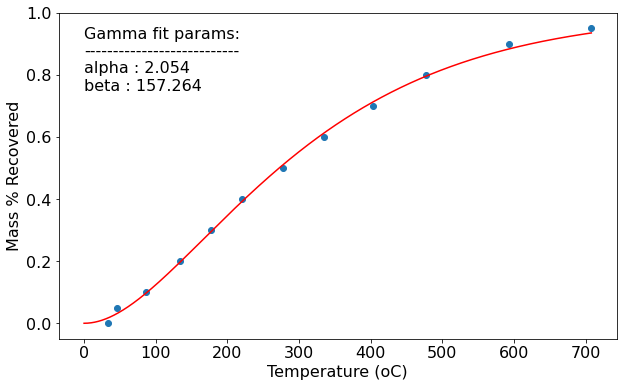

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gamma_fit("RA", ax, date="recent");

Above, a gamma CDF has been fit to the most recent distillation profile of the "RA" crude. We can see that visually, the gamma CDF fits the data well.

### 3. Distillation profile of a crude mixture

#### 3.1 Gamma mixture model

Given two separate crude oils, we can fit two separate gamma CDFs to each distillation profile. But what if these two crudes were mixed together? Well one simple way of modeling the resulting distillation profile is through a gamma mixture model, shown below,

$F(x) = \pi_1 F(x, \alpha_1, \beta_1) + \pi_2 F(x, \alpha_2, \beta_2)$.

Here, $\alpha_i$ and $\beta_i$ would be the parameters determined from the fits performed on each individual oil's distillation profile ($i=1,2$). The parameters $\pi_i$ ($i=1,2$) represent the fraction of each oil which make up the mixture.

Mixture models make the assumptions that the underlying data come from components which are independent of one another, and which simply mix based on their proportions in the overall population to yield a net distribution that describes the entire population. As such, physically, this model makes the assumption that the molecules from each crude evaporate under the same probabilistic distributions as they did when unmixed.

The `gamma_mixture_distillation_profile` function below implements the gamma mixture model, given the acronym of two crudes (**crude1**, **crude2**), and volumes for each crude that make up the hypothetical mixture. These volumes define the fraction of each oil which make up the mixture, $\pi_i$.

In [4]:
crude1 = "MGS"
crude2 = "RA"
vol1 = 10
vol2 = 5

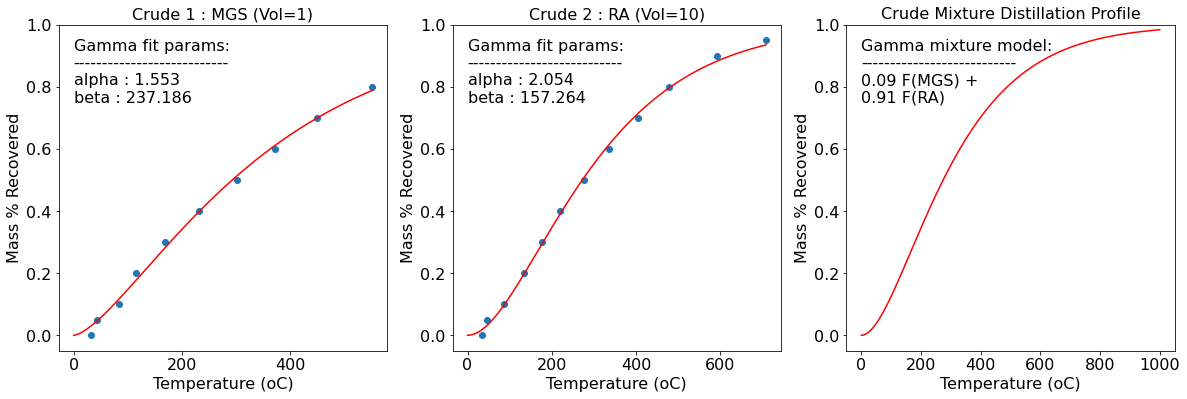

In [7]:
mix_df, mix_plot = gamma_mixture_distillation_profile("MGS", "RA", 1, 10)

In [8]:
mix_df

,Mass % Recovered,Temperature (oC)
0,0.05,57
1,0.10,86
2,0.20,134
3,0.30,178
4,0.40,224
5,0.50,273
6,0.60,329
7,0.70,397
8,0.80,487
9,0.90,634
